In [1]:
import os
from importlib import reload
import utils; reload(utils)
from utils import *
%matplotlib inline

In [37]:
# Get NOAA Observed & Predicted Data
data_dir = '/Users/slawler/Repos/dc_data' # Assign directory to save data in

# '8594900'  # DC
# '8635750' # Lewisetta
gages = ['8770777', '8770613', '8771013']

# Create Datetime Objects
start     = datetime(2017, 8, 15)    
stop      = datetime(2017, 9 , 14) 

for i, gage in enumerate(gages):
    preds = GetHourlyPreds(gage, start, stop)
    obs = GetHourlyObs(gage, start, stop)
    tmp = obs.merge(preds, left_index=True, right_index=True, how = 'outer')
    
    if i ==0:
        df = tmp.copy()
    else:
        df = tmp.merge(df, left_index=True, right_index=True, how = 'outer')
df.to_csv(r'T:\CCSI\TECH\2018_HoustonCity\GIS\DATA\Gages\GageData\PROCESSED\WORKING\noaa_stage.csv')     
df.head()

,8771013,8771013_tides,8770613,8770613_tides,8770777,8770777_tides
2017-08-15 00:00:00,0.026,-0.437,-0.210,-0.500,-0.161,-0.595
2017-08-15 01:00:00,0.033,-0.392,-0.295,-0.556,-0.423,-0.709
2017-08-15 02:00:00,0.105,-0.302,-0.413,-0.514,-0.531,-0.735
2017-08-15 03:00:00,0.249,-0.181,-0.394,-0.379,-0.591,-0.643
2017-08-15 04:00:00,0.381,-0.047,-0.266,-0.207,-0.633,-0.428


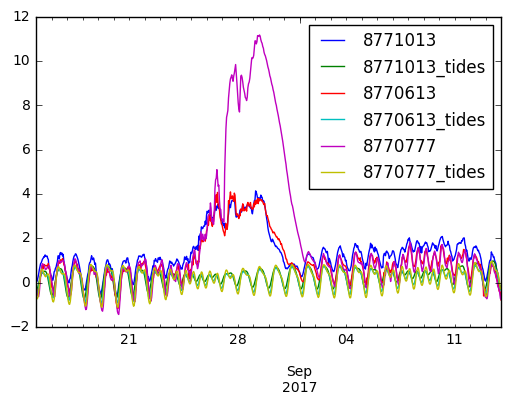

In [25]:
df.plot()

In [31]:
coords = { '8770777':(-95.25250000, 29.71833333),
            '8770613':(-94.91694444, 29.46888889), 
            '8771013':(-94.98361111, 29.66916667)
         }

In [36]:
crds = pd.DataFrame.from_dict(coords, orient = 'index')
crds.rename(columns = {0:'Lon', 1:'Lat'}, inplace=True)
crds.to_csv(r'T:\CCSI\TECH\2018_HoustonCity\GIS\DATA\Gages\RAW\NOAA_Tidal_Gages\tidal_gages.csv')